# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

* The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by one customer.
* The rating column contains both numbers and text.
* The day_of_the_week column seems to be divided into weekday and weekend without specifying the exact day.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
#return the shape (rows,columns) of the dataframe
df.shape

(1898, 9)

#### Observations:
The DataFrame has 1898 rows and 9 columns of data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
1. There are two types of data in the DataFrame - numerical and categorical.  
2. order_id, customer_id, food_preparation_time and delivery_time are integer numerical data.
3. cost_of_the_order is the only float type numerical data.
4. Interestingly, rating is an object.
5. Additionally, restaurant_name, cuisine_type and day_of_the_week are also all categorical variables with object data type.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
# use isnull to check for missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values detected in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
# use describe to get the summary statistics of the data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
* The food preparation time is an average of **27.37** minutes with a minimum of **20** minutes and a maximum of **35** minutes.
* The delivery time after food has been picked average around ~ 24 minutes. 
* Based on the summary statistics, it takes ~ 51 minutes (food_preparation_time + delivery_time) on average from when the order is confirmed by the restaurant to when it is dropped off to the customer.
* The minimun cost of orders in 7.48 dollars while the maximum is 35.41 dollars.

### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
# use value_counts to find out how many orders were not rated
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
Of the 1898 orders collected into the dataset, 736 orders were not given a rating.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [5 marks]

#### Order ID

In [8]:
# use nunique to check for number of unique order IDs
df.order_id.nunique()

1898

#### Customer ID

In [9]:
# use nunique to check for number of unique customers IDs
df.customer_id.nunique()

1200

In [10]:
# no. of customers that have used the app atleast twice
sum(df.customer_id.value_counts()>=2)

416

#### Restaurant Name

In [11]:
# use nunique to check for number of unique restaurants
df.restaurant_name.nunique()

178

#### Observations
* There are 1898 unique orders with no duplicates in the dataset.
* There are 1200 unique customer IDs of which 416 have used the app a minimum of two times.
* FoodHub was used to order from 178 restaurants in the current dataset.

#### Cuisine Type

In [12]:
# use nunique to check for number of unique cuisines
df.cuisine_type.nunique()

14

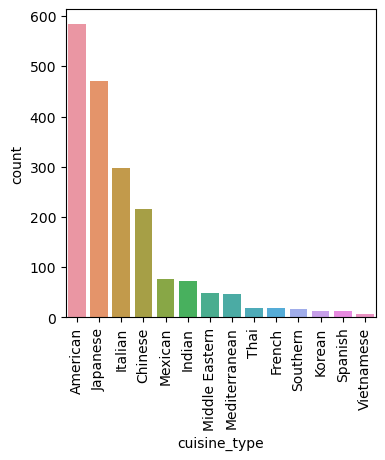

In [13]:
#plot the counts of orders on different cuisine
plt.figure(figsize=(4,4))
sns.countplot(data=df, x = "cuisine_type", order = df.cuisine_type.value_counts().index) 
plt.xticks(rotation = 90)
plt.show()

#### Observations
* The restaurants offer 14 unique types of cuisine with American being the most popular while Vietnamese is the least ordered.

#### Day of the Week

In [14]:
#count the number of orders on different days of the week
df.day_of_the_week.value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

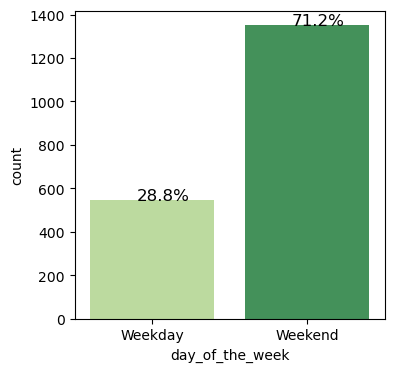

In [15]:
#plot the counts of orders on different days of the week
plt.figure(figsize=(4,4))
plot = sns.countplot(data=df, x = "day_of_the_week", palette = "YlGn", order = ["Weekday", "Weekend"])

#for loop to label each bar with its percentage value
for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / len(df))
        x = p.get_x() + p.get_width() / 2 - 0.1                       # get x coordinate to place the label
        y = p.get_y() + p.get_height()                                # get y coordinate to place the label
        plot.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage using x and y
        
plt.show()

#### Observations 
* **71.2%** of the online orders are placed during the weekends.

#### Rating

In [16]:
#check for number of ratings
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

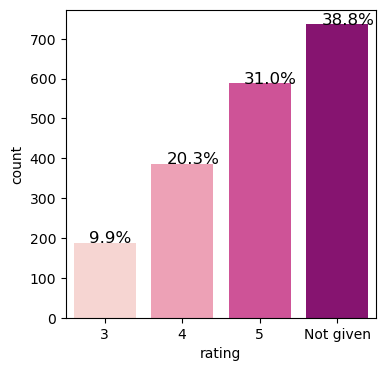

In [17]:
#plot the rating counts
plt.figure(figsize=(4,4))
plot = sns.countplot(data=df, x = "rating", palette = "RdPu", order = ["3", "4", "5", "Not given"])

#for loop to label each bar with its percentage value
for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / len(df))
        x = p.get_x() + p.get_width() / 2 - 0.2                       # get x coordinate to place the label
        y = p.get_y() + p.get_height()                                # get y coordinate to place the label
        plot.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage using x and y

plt.show()

#### Observations
* **51.3%** of the orders were given a rating above **4**. However, **38.8%** of the orders were not rated at all.

### Exploring other numerical variables

In [18]:
#define a function to plot boxplot on top and histogram below
def fig_bxplt_hist(column, color, figsize = (6,4)):
    
    #create a figure that has two matplotlib.Axes objects (ax_box, ax_hist) which share the x-axis
    f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, height_ratios = [0.25, 0.75], figsize = figsize)

    #first sublot is boxplot with mean displayed as a circle
    sns.boxplot(x = column, ax = ax_box, showmeans = True, color = color, medianprops = {"color":"limegreen"}, 
                meanprops = {"marker":"o","markerfacecolor":"y","markeredgecolor":"y", "markersize":"6"})

    #second subplot is the histogram with median added as solid line and mean added as dashed line
    sns.histplot(x = column, ax = ax_hist, color = color)
    ax_hist.axvline(np.mean(column), color = 'y', linestyle = '--')     
    ax_hist.axvline(np.median(column), color = 'limegreen', linestyle = '-') 
    
    #remove x axis name for the boxplot
    ax_box.set(xlabel = '')
    plt.show()

#### Cost of the Order

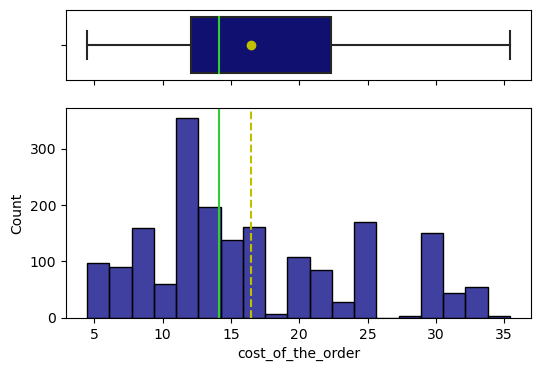

In [19]:
fig_bxplt_hist(df.cost_of_the_order, "navy")

#### Delivery Time

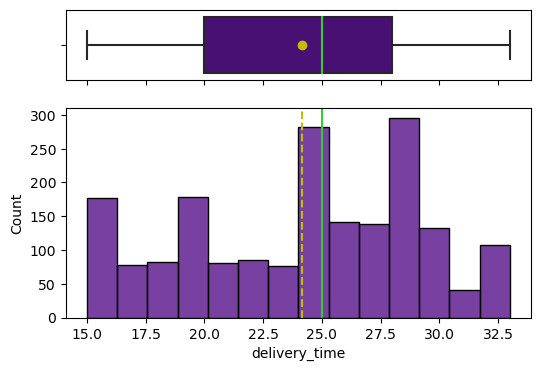

In [20]:
fig_bxplt_hist(df.delivery_time, "indigo")

#### Food Preparation Time

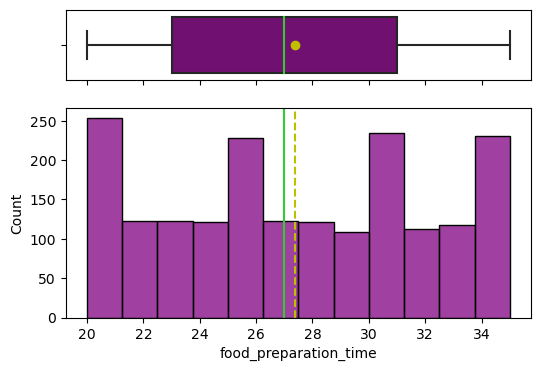

In [21]:
fig_bxplt_hist(df.food_preparation_time, "purple")

#### Observations: 
* The cost of orders is positively skewed with some orders costing upto 35 dollars while the average cost is 17 dollars and median cost is 14 dollars.
* The delivery time is only slightly negatively skewed as the average delivery time is ~24 min and median is 25 min.
* The average food preparation time is ~ 27 minutes and is uniformly distributed between 20 to 35 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [22]:
# count number of orders for the restaurant using value_counts and return top 5 using nlargest
df.restaurant_name.value_counts().nlargest()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations
The **top 5** restaurants in terms of orders received are:
1. **Shake Shack** - 219 orders
2. **The Meatball Shop** - 132 orders
3. **Blue Ribbon Sushi** - 119 orders
4. **Blue Ribbon Fried Chicken** - 96 orders
5. **Parm** - 68 orders

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [23]:
# count the most ordered cuisine on weekends
df[df['day_of_the_week']=='Weekend'].cuisine_type.value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
The most popular cuisine on weekends is **American** with 415 orders, followed by Japanese, Italian and Chinese.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [1 marks]

In [24]:
#use len to return the number of records with cost of order more than 20 dollars
total_orders_greater_than_20 = len(df[df['cost_of_the_order']>20])

#calculate the percentage of such records by dividing with total rows i.e. total orders
percent_orders_greater_than_20 =  (total_orders_greater_than_20/len(df)) * 100

round(percent_orders_greater_than_20,2)

29.24

#### Observations:
**29.24%** of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [25]:
#calculate the mean order delivery time
round(df.delivery_time.mean(),2)

24.16

#### Observations:
The mean order delivery time is **24.16** minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [26]:
#count number of orders for customers using value_counts and return top 3 using nlargest
df.customer_id.value_counts().nlargest(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The top 3 most frequent customers and their total orders placed are as follows:
* Customer ID **52832** - 13 orders
* Customer ID **47440** - 10 orders
* Customer ID **83287** - 9 0rders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [5 marks]


### A. Cuisine Type vs other variables

#### A1. Cuisine Type vs Cost of Order

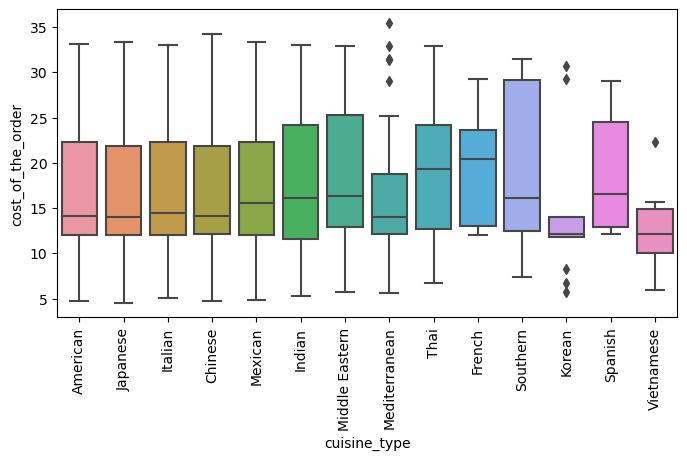

In [27]:
#box plot of cost of order for cuisine types plotted in order of popularity
plt.figure(figsize=(8,4))
sns.boxplot(data = df, x = "cuisine_type", y = "cost_of_the_order", order = df.cuisine_type.value_counts().index)
plt.xticks(rotation = 90)
plt.show()

#### Observations
* The range of order costs is uniform with a median of around 14 dollars for most cuisines.
* The median cost of French cuisine is the highest followed by Thai cuisine.
* There are some outliers in Mediterranean, Korean and Vietnamese cuisine and the box plots indicate lower median costs.
* This might be due to fewer data points as these are less popular cuisines and don't have as many orders.

#### A2. Cuisine Type vs Food Preparation Time

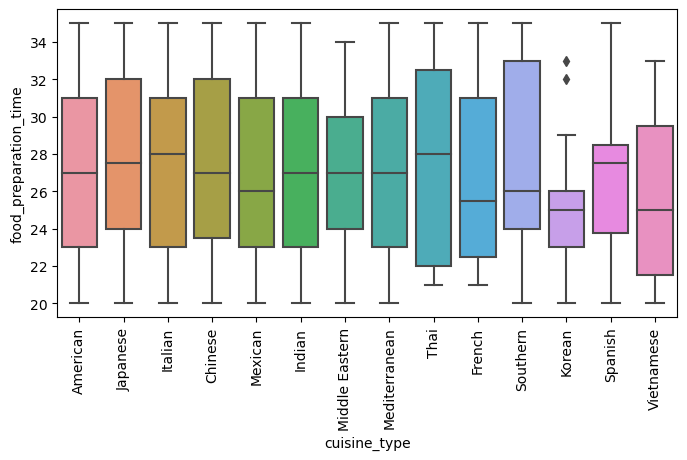

In [28]:
# box plot of food_preparation_time for cuisine types plotted in order of popularity
plt.figure(figsize=(8,4))
sns.boxplot(data = df, x = "cuisine_type", y = "food_preparation_time", order = df.cuisine_type.value_counts().index)
plt.xticks(rotation = 90)
plt.show()

#### Observations
Most cuisines require the same amount of time for preparation with Korean being the only one with a few outliers. This may be due to insufficient data as there are fewer orders of Korean cuisine.

#### A3. Cuisine vs Day of the Week

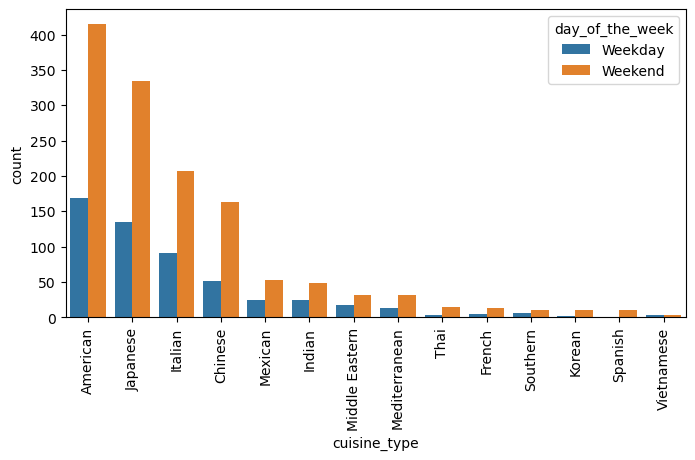

In [29]:
# countplot of cuisines sold based on day of the week
plt.figure(figsize = (8,4))
sns.countplot(data = df, x = 'cuisine_type',hue ='day_of_the_week', hue_order = ['Weekday', 'Weekend'], order = df.cuisine_type.value_counts().index)
plt.xticks(rotation = 90)
plt.show()

#### Observations
* The popularity trend of cuisines is the same during weekdays and weekends. 
* There are larger number of orders placed during the weekend indicating more interest in ordering-in during the weekend.

### B. Rating vs other variables

#### B1. Rating vs Delivery Time

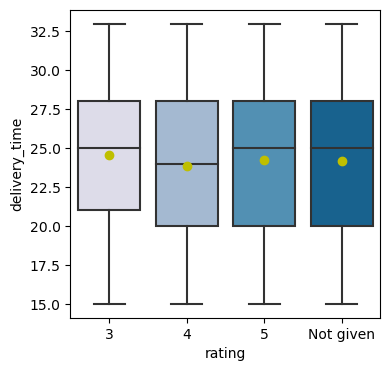

In [30]:
# box plot of delivery times for different ratings
plt.figure(figsize=(4,4))
sns.boxplot(data = df, x = "rating", y = "delivery_time", order = ['3','4','5','Not given'], palette = "PuBu", 
            showmeans=True, meanprops = {"marker":"o","markerfacecolor":"y","markeredgecolor":"y", "markersize":"6"})
plt.show()

#### B2. Rating vs Food Preparation Time

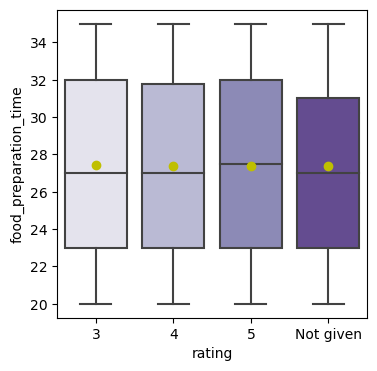

In [31]:
# box plot of food preparation times for different ratings
plt.figure(figsize=(4,4))
sns.boxplot(data = df, x = "rating", y = "food_preparation_time", order = ['3','4','5','Not given'], palette = "Purples", 
            showmeans = True, meanprops = {"marker":"o","markerfacecolor":"y","markeredgecolor":"y", "markersize":"6"})
plt.show()

#### B3. Rating vs Cost of Order

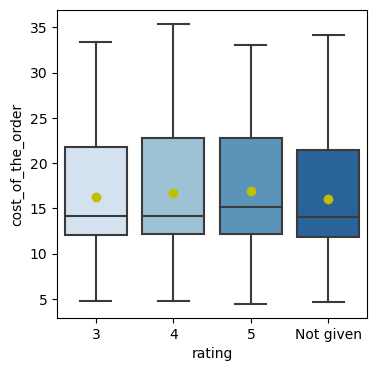

In [32]:
# box plot of cost of orders for different ratings
plt.figure(figsize=(4,4))
sns.boxplot(data = df, x = "rating", y = "cost_of_the_order", order = ['3','4','5','Not given'], palette = "Blues", 
            showmeans =True, meanprops = {"marker":"o","markerfacecolor":"y","markeredgecolor":"y", "markersize":"6"})
plt.show()

#### Observations
* The ratings of the restaurants are not affected by the delivery time, food preparation time or cost of order. 

### C. Day of the week vs other variables

#### C1. Day of the week vs Cost of Order

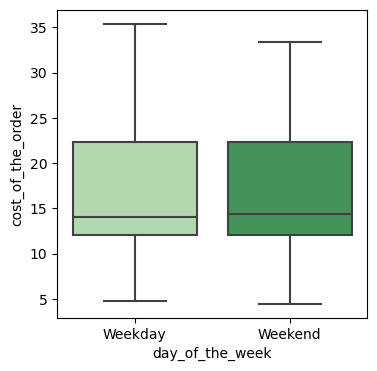

In [33]:
# box plot of cost of orders for different days of the week
plt.figure(figsize=(4,4))
sns.boxplot(data = df, x = "day_of_the_week", y = "cost_of_the_order", order = ['Weekday', 'Weekend'], palette = "Greens")
plt.show()

#### C2. Day of the week vs Delivery Time

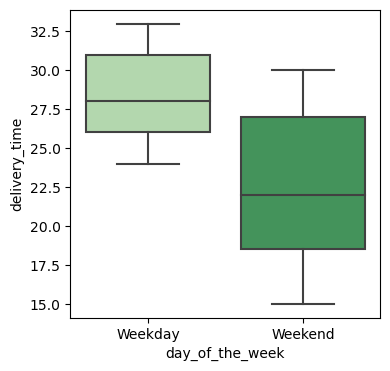

In [34]:
# box plot of delivery times for different days of the week
plt.figure(figsize=(4,4))
sns.boxplot(data = df, x = "day_of_the_week", y = "delivery_time", order = ['Weekday', 'Weekend'], palette = "Greens")
plt.show()

#### C3. Day of the week vs Food Preparation Time

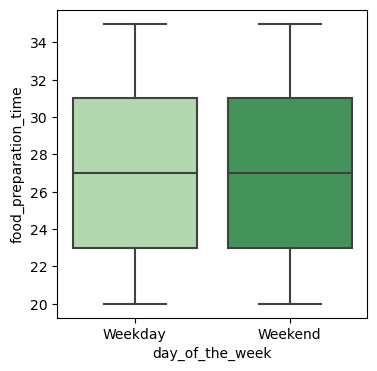

In [35]:
# box plot of food preparation times for different days of the week
plt.figure(figsize=(4,4))
sns.boxplot(data = df, x = "day_of_the_week", y = "food_preparation_time", order = ['Weekday', 'Weekend'], palette = "Greens")
plt.show()

#### Observations
* The delivery times during the weekdays are much longer averaging around **28 minutes** compared to weekends (22 minutes).
* Despite the demand being much higher during the weekends, food preparation time is the same throughout the week.

#### Correlation

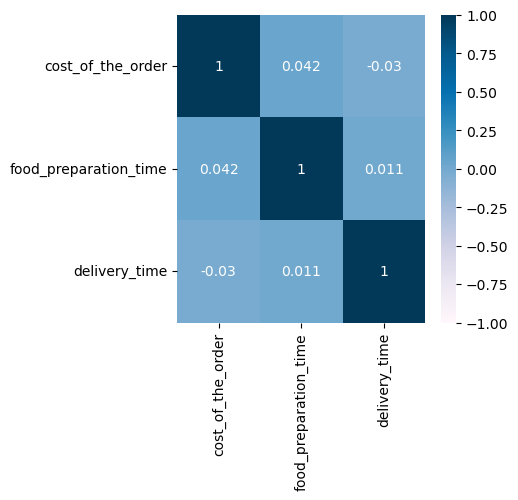

In [36]:
# construct a correlation matrix among the cost of order, food preparation and delivery times
var_list = ['cost_of_the_order','food_preparation_time', 'delivery_time']
corr_matrix = df[var_list].corr()

# plot the correlation matrix as a heatmap
plt.figure(figsize = (4,4))
sns.heatmap(corr_matrix, annot =  True, cmap = "PuBu", vmin = -1.0)
plt.show()

#### Observations:
Based on the heatmap, there is no correlation between the cost of the order, food preparation time and delivery time. 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [1.5 marks]

In [37]:
#filter the dataset and exclude orders that were not rated
df_with_ratings = df[df["rating"] != "Not given"]
df_with_ratings.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30


In [38]:
#convert rating data into numeric values
df_with_ratings['rating'] = df_with_ratings['rating'].astype(int)

#create a dataframe with restaurants grouped by count
df_rcount = df_with_ratings.groupby('restaurant_name')['rating'].count().sort_values(ascending = False).to_frame().reset_index()
df_rcount.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [39]:
#create a dataframe with restaurants grouped by mean rating
df_rmean = df_with_ratings.groupby('restaurant_name')['rating'].mean().sort_values(ascending = False).to_frame().reset_index()
df_rmean.head()

,restaurant_name,rating
0,'wichcraft,5.0
1,Ravagh Persian Grill,5.0
2,Chola Eclectic Indian Cuisine,5.0
3,Chote Nawab,5.0
4,Junoon,5.0


In [41]:
#merge the dataframes to get list of restaurants with rating count > 50 and mean ratings > 4
df_promo = pd.merge(df_rcount[df_rcount['rating']>50],df_rmean[df_rmean['rating']>4], on=['restaurant_name'], how='inner')
df_promo

,restaurant_name,rating_x,rating_y
0,Shake Shack,133,4.278195
1,The Meatball Shop,84,4.511905
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125


#### Observations:
* There are four restaurants that meet the criteria of the company's promotional offer. These are **Shake Shack**, **The Meatball Shop**, **Blue Ribbon Sushi** and **Blue Ribbon Fried Chicken**
* Shake Shack has gotten the most feedback with 133 ratings while The Meatball Shop has the highest average rating of ~4.5 with a total of 84 ratings. This is not surprising given their popularity. The restaurants rank 1st and 2nd respectively in the total number of orders.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [1.5 marks]

In [42]:
#define a function to calculate the revenue for each order
def revenue_calculator(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return cost * 0

# apply the defined function to order costs and add as a new column - Revenue
df ['Revenue'] = df.cost_of_the_order.apply(revenue_calculator)

#check the new column
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [43]:
# calculate the total revenue i.e. the sum of revenue from all orders
round(df.Revenue.sum(),2)

6166.3

#### Observations:
The net revenue of the company generated across all orders is **$6166.30**

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [1 marks]

In [44]:
# create a new column for total time
df['total_time']=df['food_preparation_time']+df['delivery_time']

# count the number of orders that take more than 60 minutes
total_time_greater_than_60 = len(df[df['total_time']>60])

# calculate the percentage of such orders against all the orders
percent_total_time_greater_than_60 =  (total_time_greater_than_60/len(df)) * 100

print(percent_total_time_greater_than_60)

10.537407797681771


#### Observations:
**10.54%** of the orders take longer than 60 minutes to get delivered from the time the order is placed

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [1 marks]

In [45]:
# Write the code here
df.groupby(['day_of_the_week']).delivery_time.mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
* The mean delivery time is **22.47 minutes** during the weekends and **28.34 minutes** during the weekdays.
* The mean delivery time is ~ 6 minutes longer during the weekdays which might be due to more traffic during office hours and more vehicles on the road during the week.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [5 marks]

### Conclusions:

A dataset containing 1898 unique online food orders was analyzed. These orders were placed in the city of New York via the FoodHub smartphone app. Some of the key conclusions are as following:

* More people prefer ordering-in during the weekend with over 71% of the orders placed during that time period.
* 416 people out of 1200 have used the app more than twice with the highest number of orders by a single person being 13.
* The cost of orders is positively skewed with some orders upto 35 dollars while the average cost is 17 dollars.
* American food is the most popular of the 14 cuisines currently offered from 178 restaurants by FoodHub followed by Japanese, Italian and Chinese. 
* ~51% of the orders were rated above 4 and there were no ratings under 3 indicating a general satisfaction with the food delivered. 
* The food preparation time does not vary throughout the week. On the other hand, despite higher demand during the weekend, delivery times are shorter. Thus, the total time to order fulfillment is dependent on the delivery time.

### Recommendations:

* 39% of the orders received no rating, indicating a gap in information. We recommend providing incentives to customers such as points or discounts to encourage an increase in feedback. This would help drive further decisions on which restaurants/cuisines to promote.
* FoodHub should look into factors such as high traffic, less delivery personnel, etc. driving increased delivery time during weekdays.
* Currently the number of repeat customers is 416 out of 1200 i.e. ~35%. FoodHub can work towards increasing customer retention. Offering memberships that provide incentives such as reduced delivery fees or coupons is recommended. Referal programs with perks can be another way to keep active customers while also building a bigger customer base.
* Customers can also be given recommendations for dishes/restaurants that match their preferences.  
* The popularity of different cuisines is the same throughout the week and reducing total order time may help in increasing online orders during the week. * Further analysis can include customer demographics to understand the spending range which may vary between students and working professionals. A potential way to increase customers may include student/company discounts.
* The current data is limited and it would be interesting to further break down the week and study how the delivery time and demand of orders vary between the start of the week i.e. Monday and as we move into the weekend.